In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from mechafil import data
import pandas as pd
import numpy as np

In [3]:
start_date = datetime(2021, 3, 15).date()
# start_date = datetime(2020, 10, 15).date()
current_date = datetime.today().date()
forecast_length = 365*3
end_date = current_date + timedelta(days=forecast_length)

In [4]:
historical_stats = data.get_historical_network_stats(start_date, current_date, end_date)

In [6]:
scheduled_df = data.query_sector_expirations(start_date, end_date)

In [7]:
historical_stats['date'] = pd.to_datetime(historical_stats['date']).dt.date
scheduled_df['date'] = scheduled_df['date'].dt.date
merged_df = historical_stats.merge(scheduled_df, on='date', how='inner')

<IPython.core.display.Javascript object>


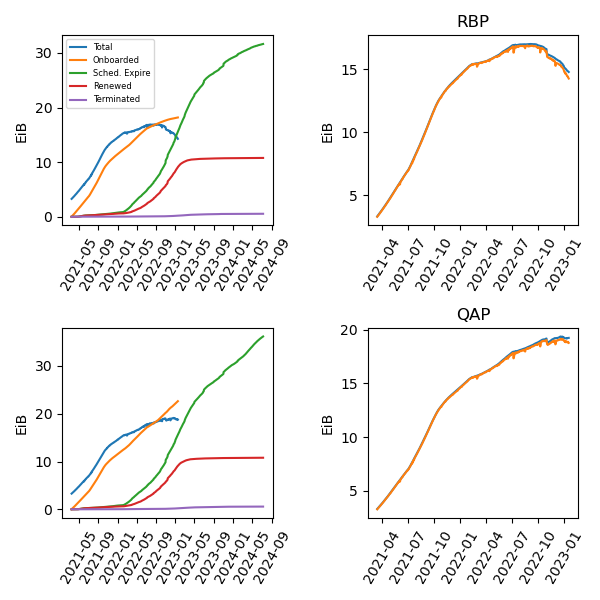

In [8]:
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.plot(historical_stats['date'], historical_stats['total_raw_power_eib'], label='Total')
plt.plot(historical_stats['date'], historical_stats['day_onboarded_rb_power_pib'].cumsum()/1024, label='Onboarded')
plt.plot(scheduled_df['date'], scheduled_df['total_rb'].cumsum()/1024, label='Sched. Expire')
plt.plot(scheduled_df['date'], scheduled_df['extended_rb'].cumsum()/1024, label='Renewed')
plt.plot(scheduled_df['date'], scheduled_df['terminated_rb'].cumsum()/1024, label='Terminated')
plt.xticks(rotation=60)
plt.ylabel('EiB')
plt.legend(fontsize=6)

rbp0 = merged_df.iloc[0]['total_raw_power_eib']
plt.subplot(2,2,2)
y1 = rbp0 + (merged_df['day_onboarded_rb_power_pib'] + merged_df['extended_rb'] - merged_df['terminated_rb'] - merged_df['total_rb']).cumsum()/1024
plt.plot(merged_df['date'], y1, label='Computed')
plt.plot(merged_df['date'], historical_stats['total_raw_power_eib'], label='Total')
plt.xticks(rotation=60)
plt.ylabel('EiB')
plt.title('RBP')

plt.subplot(2,2,3)
plt.plot(historical_stats['date'], historical_stats['total_qa_power_eib'], label='Total')
plt.plot(historical_stats['date'], historical_stats['day_onboarded_qa_power_pib'].cumsum()/1024, label='Onboarded')
plt.plot(scheduled_df['date'], scheduled_df['total_qa'].cumsum()/1024, label='Sched. Expire')
plt.plot(scheduled_df['date'], scheduled_df['extended_qa'].cumsum()/1024, label='Renewed')
plt.plot(scheduled_df['date'], scheduled_df['terminated_qa'].cumsum()/1024, label='Terminated')
plt.xticks(rotation=60)
plt.ylabel('EiB')

qap0 = merged_df.iloc[0]['total_qa_power_eib']
plt.subplot(2,2,4)
y1 = qap0 + (merged_df['day_onboarded_qa_power_pib'] + merged_df['extended_qa'] - merged_df['terminated_qa'] - merged_df['total_qa']).cumsum()/1024
plt.plot(merged_df['date'], y1, label='Computed')
plt.plot(merged_df['date'], historical_stats['total_qa_power_eib'], label='Total')
plt.xticks(rotation=60)
plt.ylabel('EiB')
plt.title('QAP')

plt.tight_layout()

In [9]:
total_onboarded = rbp0 + (historical_stats['day_onboarded_rb_power_pib'].cumsum()/1024).values[-1]
total_renewed = (scheduled_df['extended_rb'].cumsum()/1024).values[-1]
total_se = (scheduled_df["schedule_expire_rb"].cumsum()/1024).values[-1]
total_terminate = (scheduled_df['terminated_rb'].cumsum()/1024).values[-1]

print(total_onboarded + total_renewed - (total_se + total_terminate))

-0.5035145878791809


In [10]:
merged_df[['extended_rb', 'total_rb', 'terminated_rb']] * 0.5

,extended_rb,total_rb,terminated_rb
0,0.000000,0.000000,0.000015
1,0.000000,0.000153,0.000275
2,0.000000,0.000031,0.000046
3,0.000000,0.000015,0.000015
4,0.000000,0.000015,0.000107
...,...,...,...
668,19.499832,29.457199,1.234650
669,18.301987,28.816238,1.348969
670,18.082947,33.026611,1.315506
671,23.498779,35.260345,1.156464


In [12]:
merged_df

,circulating_fil,mined_fil,vested_fil,locked_fil,burnt_fil,reserve_disbursed_fil,date,total_raw_power_eib,total_qa_power_eib,day_onboarded_rb_power_pib,...,expired_rb,terminated_rb,schedule_expire_rb,extended_qa,expired_qa,terminated_qa,schedule_expire_qa,total_rb,total_qa,total_pledge
0,1.006087e+08,4.259703e+07,1.087510e+08,4.873596e+07,1.906991e+07,1.706662e+07,2021-03-15,3.281365,3.282306,30.778351,...,0.000000,0.000031,0.000031,0.000000,0.000000,0.000031,0.000031,0.000000,0.000000,0.000000
1,1.011143e+08,4.294468e+07,1.093991e+08,4.913035e+07,1.916571e+07,1.706662e+07,2021-03-16,3.310809,3.311754,30.751831,...,0.000305,0.000549,0.000854,0.000000,0.000305,0.000549,0.000854,0.000305,0.000305,10.000000
2,1.016796e+08,4.329793e+07,1.100472e+08,4.953880e+07,1.919340e+07,1.706662e+07,2021-03-17,3.341048,3.341986,31.845703,...,0.000061,0.000092,0.000153,0.000000,0.000061,0.000092,0.000153,0.000061,0.000061,1.200215
3,1.022119e+08,4.364709e+07,1.106954e+08,4.994090e+07,1.925624e+07,1.706662e+07,2021-03-18,3.369592,3.370540,31.429504,...,0.000031,0.000031,0.000061,0.000000,0.000031,0.000031,0.000061,0.000031,0.000031,0.362945
4,1.027568e+08,4.399606e+07,1.113435e+08,5.034152e+07,1.930788e+07,1.706662e+07,2021-03-19,3.396884,3.397818,31.384003,...,0.000031,0.000214,0.000244,0.000000,0.000031,0.000214,0.000244,0.000031,0.000031,0.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,4.220503e+08,2.532286e+08,3.210606e+08,1.348757e+08,3.442985e+07,1.706662e+07,2023-01-12,14.459030,18.846631,6.156769,...,20.170898,2.469299,61.383698,39.003891,20.174455,2.469573,61.391754,58.914398,58.922182,382016.360197
669,4.224663e+08,2.534934e+08,3.213286e+08,1.349784e+08,3.444384e+07,1.706662e+07,2023-01-13,14.443589,18.863914,6.223999,...,21.599274,2.697937,60.330414,36.637223,21.733941,2.698919,60.499313,57.632477,57.800394,367873.934745
670,4.232845e+08,2.537599e+08,3.215966e+08,1.346827e+08,3.445591e+07,1.706662e+07,2023-01-14,14.353418,18.792150,6.552429,...,30.347595,2.631012,68.684235,36.224536,30.350603,2.631576,68.746449,66.053223,66.114873,442179.318600
671,4.238134e+08,2.540261e+08,3.218646e+08,1.346809e+08,3.446291e+07,1.706662e+07,2023-01-15,14.327142,18.798421,7.243774,...,23.884094,2.312927,72.833618,47.039777,23.950472,2.314736,72.944024,70.520691,70.629287,447556.898285


In [13]:
scheduled_df

,interest_date,schedule_expire_bytes,schedule_expire_bytes_qap,extended_bytes,extended_bytes_qap,terminated_bytes,terminated_bytes_qap,expired_bytes,expired_bytes_qap,schedule_expire_pledge,...,terminated_rb,schedule_expire_rb,extended_qa,expired_qa,terminated_qa,schedule_expire_qa,total_rb,total_qa,total_pledge,date
16,2021-03-15T00:00:00Z,34359738368,34359738368,0,0.000000e+00,34359738368,3.435974e+10,0,0.000000e+00,0.314372,...,0.000031,0.000031,0.000000,0.000000,0.000031,0.000031,0.000000,0.000000,0.000000,2021-03-15
17,2021-03-16T00:00:00Z,962072674304,962072674304,0,0.000000e+00,618475290624,6.184753e+11,343597383680,3.435974e+11,28.000000,...,0.000549,0.000854,0.000000,0.000305,0.000549,0.000854,0.000305,0.000305,10.000000,2021-03-16
18,2021-03-17T00:00:00Z,171798691840,171798691840,0,0.000000e+00,103079215104,1.030792e+11,68719476736,6.871948e+10,3.813931,...,0.000092,0.000153,0.000000,0.000061,0.000092,0.000153,0.000061,0.000061,1.200215,2021-03-17
19,2021-03-18T00:00:00Z,68719476736,68719476736,0,0.000000e+00,34359738368,3.435974e+10,34359738368,3.435974e+10,0.721143,...,0.000031,0.000061,0.000000,0.000031,0.000031,0.000061,0.000031,0.000031,0.362945,2021-03-18
20,2021-03-19T00:00:00Z,274877906944,274877906944,0,0.000000e+00,240518168576,2.405182e+11,34359738368,3.435974e+10,3.201275,...,0.000214,0.000244,0.000000,0.000031,0.000214,0.000244,0.000031,0.000031,0.359566,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2024-07-04T00:00:00Z,11222990062616576,31033814479864600,721554505728,7.215545e+11,1546188226560,1.515264e+13,11220722319884288,3.101794e+16,179701.971389,...,0.001373,9.968018,0.000641,27.549465,0.013458,27.563564,9.966644,27.550106,179609.820387,2024-07-04
1224,2024-07-05T00:00:00Z,12003334080692224,28172071531410500,5188320493568,5.188320e+12,0,0.000000e+00,11998145760198656,2.816688e+16,160824.744329,...,0.000000,10.661102,0.004608,25.017218,0.000000,25.021826,10.661102,25.021826,160824.744329,2024-07-05
1225,2024-07-06T00:00:00Z,6402902885138432,24665296272839800,174272593002496,1.742726e+14,0,0.000000e+00,6228630292135936,2.449102e+16,147564.857713,...,0.000000,5.686920,0.154785,21.752399,0.000000,21.907184,5.686920,21.907184,147564.857713,2024-07-06
1226,2024-07-07T00:00:00Z,6290821418582016,18661989383405600,34359738368,3.435974e+10,0,0.000000e+00,6290787058843648,1.866196e+16,109121.933095,...,0.000000,5.587372,0.000031,16.575146,0.000000,16.575176,5.587372,16.575176,109121.933095,2024-07-07
